# Transforamtion des données 

transformation des données suivant nos décision .... bla bla bla bla bla bla bla bla

## Chargement des données

In [7]:
import os
import pandas as pd

DATA_ROOT = "./Data/"
# load data with path file on a dataframe 
def load_data(file_name:str,data_folder_path=DATA_ROOT):
    data_path = os.path.join(data_folder_path, file_name)
    if not os.path.isfile(data_path):
        print("error file not found :",data_path)
        df= pd.DataFrame()
    else :
        df = pd.read_csv(data_path)
    return df

In [8]:
data_merge = load_data("DataMerge.csv")
data_merge = data_merge.drop("Unnamed: 0",axis=1)
data_merge.head(10)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingTime
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,11,0,1.0,6,1,0,0,3,3,7.373651
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,23,1,6.0,3,5,1,4,2,4,7.718969
2,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,15,3,5.0,2,5,0,3,3,3,7.013240
3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,11,3,13.0,5,8,7,5,2,3,7.193678
4,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,12,2,9.0,2,6,0,4,3,3,8.006175
5,3.0,2.0,2.0,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,...,13,0,28.0,5,7,7,7,3,3,10.796096
6,1.0,3.0,1.0,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,...,20,1,5.0,2,0,0,0,3,4,6.923570
7,1.0,2.0,3.0,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,...,22,3,10.0,2,0,0,0,3,4,6.725621
8,2.0,4.0,3.0,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,...,21,0,10.0,2,9,7,8,3,4,7.236499
9,2.0,1.0,3.0,25,No,Non-Travel,Research & Development,7,4,Medical,...,13,1,6.0,2,6,1,5,3,3,7.080088


In [9]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  Gender                   4410 non-null   object 
 11  JobLevel                 4410 non-null   int64  
 12  JobRole                  4410 non-null   object 
 13  MaritalStatus            4410 non-null   object 
 14  MonthlyIncome           

## étude des données
stats

Pour les stats nous sup les Nan et valeurs non numérique

In [10]:
data_stats = data_merge.copy()
#Drop rows with Nan
data_stats.dropna(inplace=True)
#colToDel = ["MaritalStatus", "JobRole", "Department","BusinessTravel","EducationField"]
#data_stats = data_stats.drop(colToDel, axis=1)


convertion des collones non numérique

In [11]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

enc = OneHotEncoder(handle_unknown='ignore')
cat_attribs = ["MaritalStatus", "JobRole", "Department"]
enc_df = pd.DataFrame(enc.fit_transform(data_stats[cat_attribs]).toarray())
enc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4296,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4297,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4298,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
import numpy as np


convert_collumns = {
    'BusinessTravel': 'category',
    'Department': 'category',
    'EducationField': 'category',
    'JobRole': 'category', 
    "MaritalStatus" : 'category'
}

data_stats = data_stats.astype(convert_collumns)
data_num = data_stats.select_dtypes(include=[np.number])
data_stats['Attrition'] = data_stats['Attrition'].replace(['Yes','No'],[1,0])

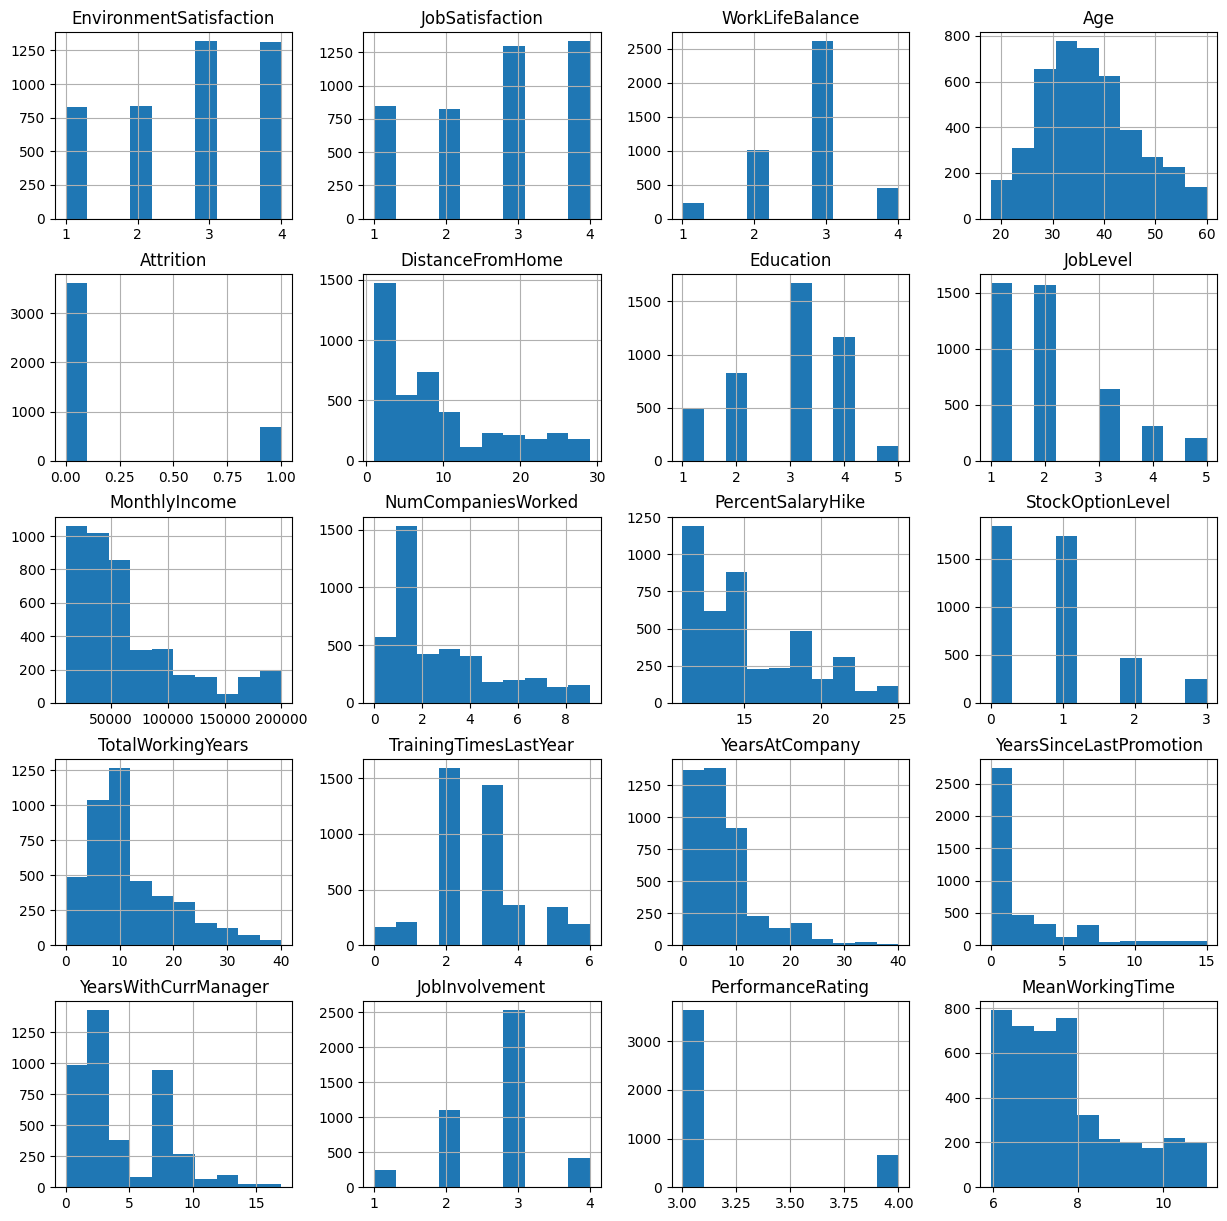

In [13]:
from matplotlib import pyplot as plt

data_stats.hist(figsize=(15,15))
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_21884\3724558390.py:9: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(bottom + 0.5, top - 0.5)


(0.475, 0.525)

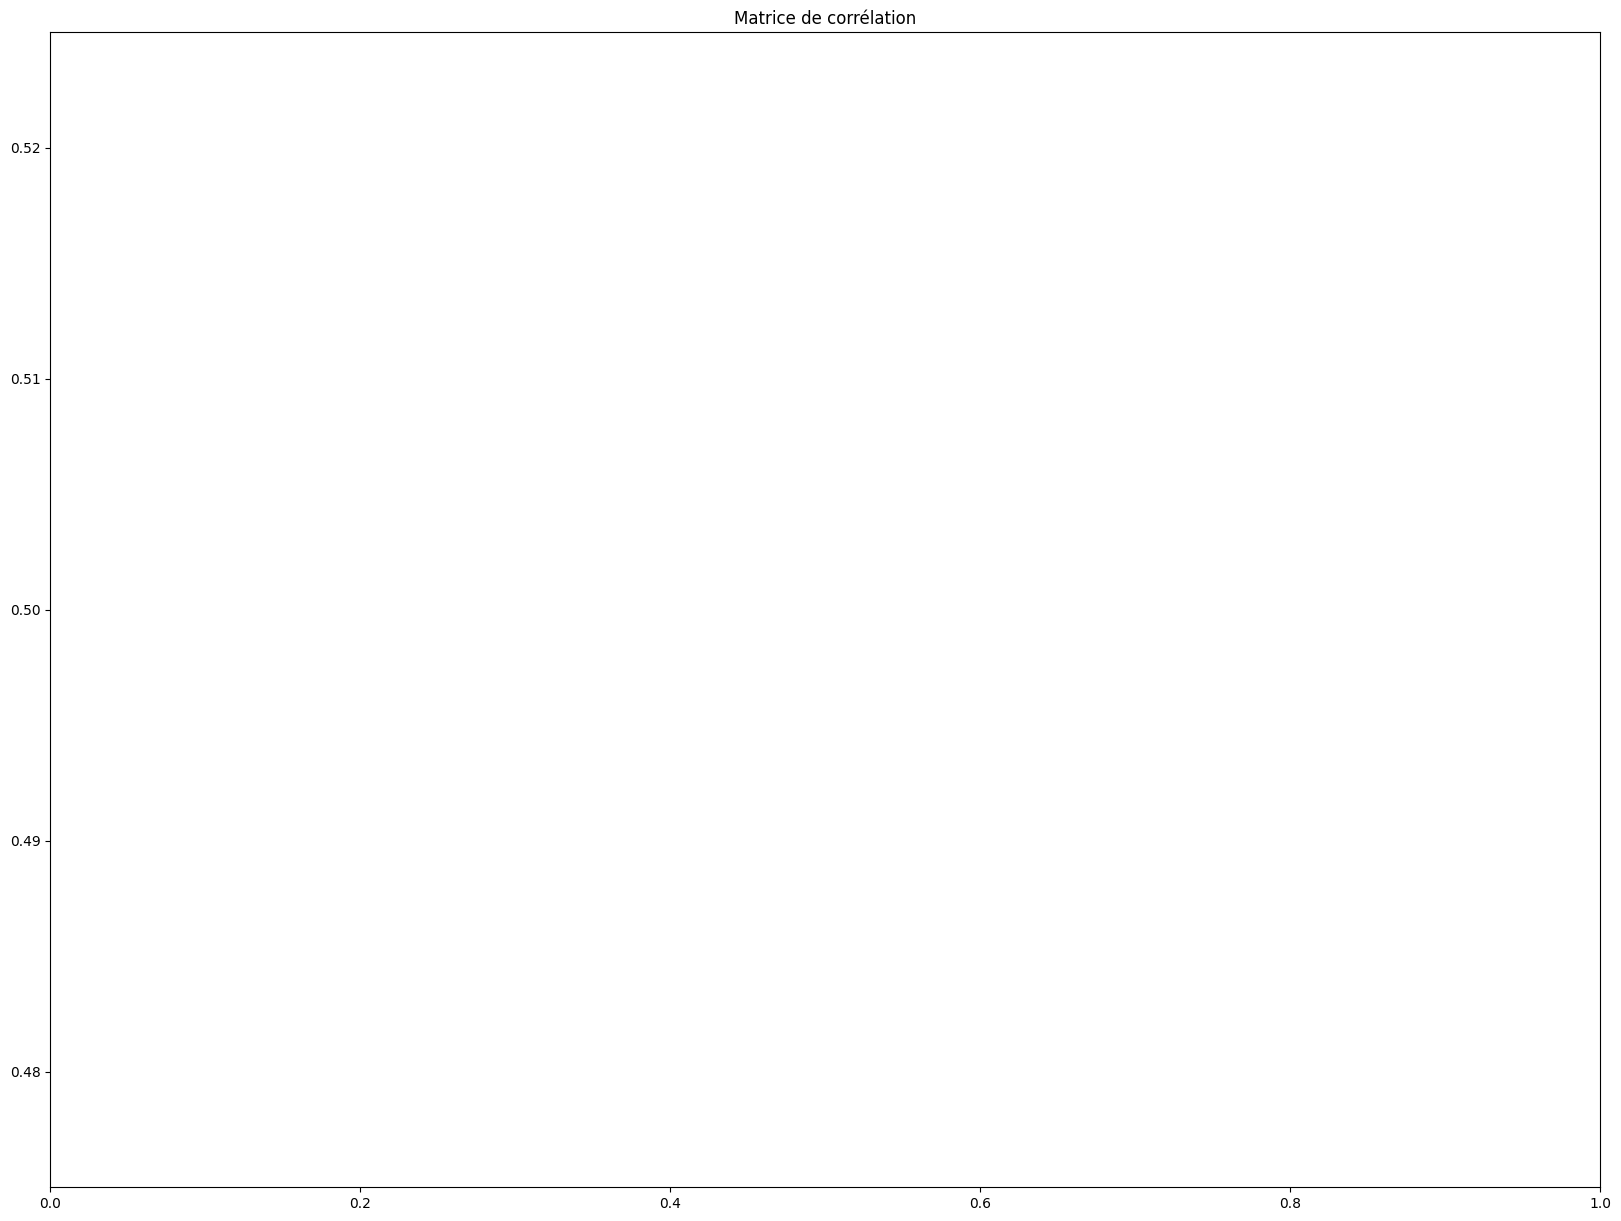

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculer et afficher la matrice de corrélation des features

fig, ax = plt.subplots(figsize=(20, 15))

ax.set_title("Matrice de corrélation")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

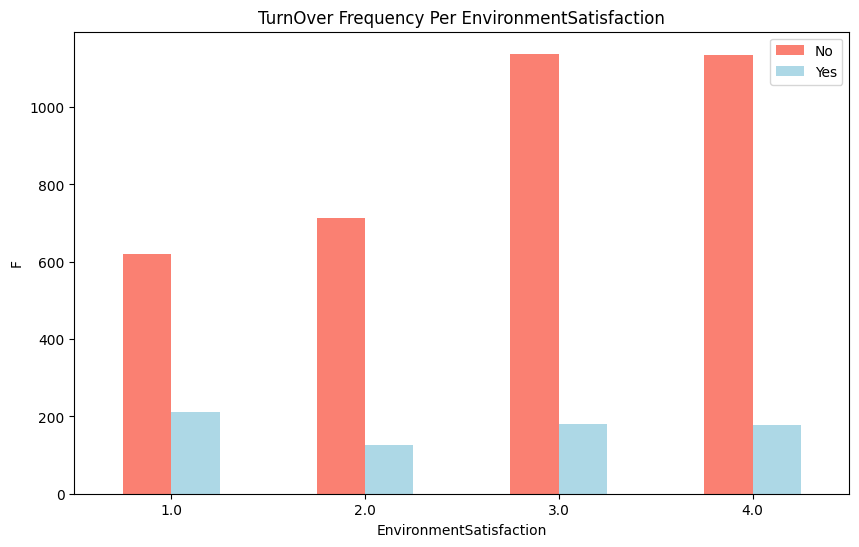

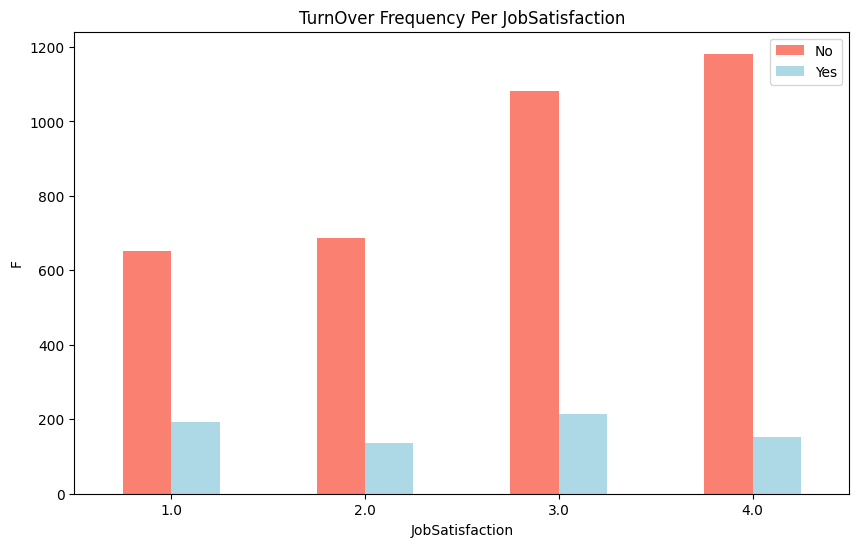

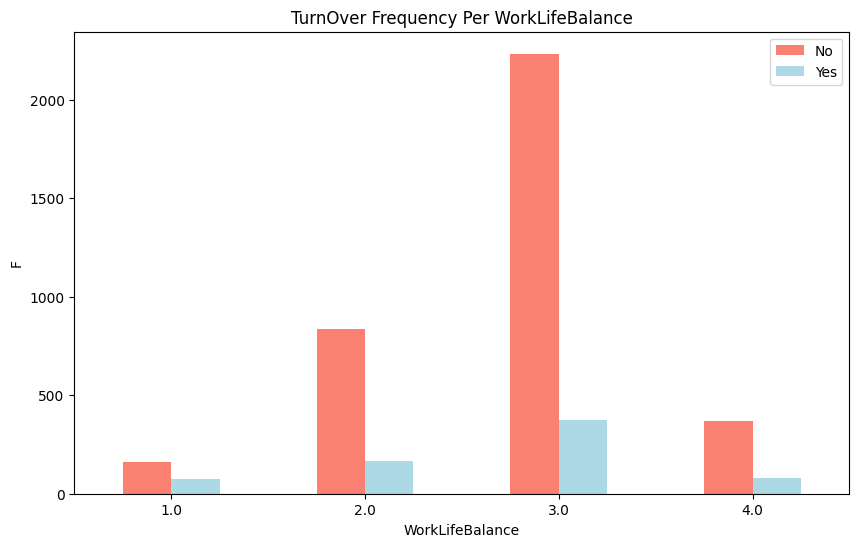

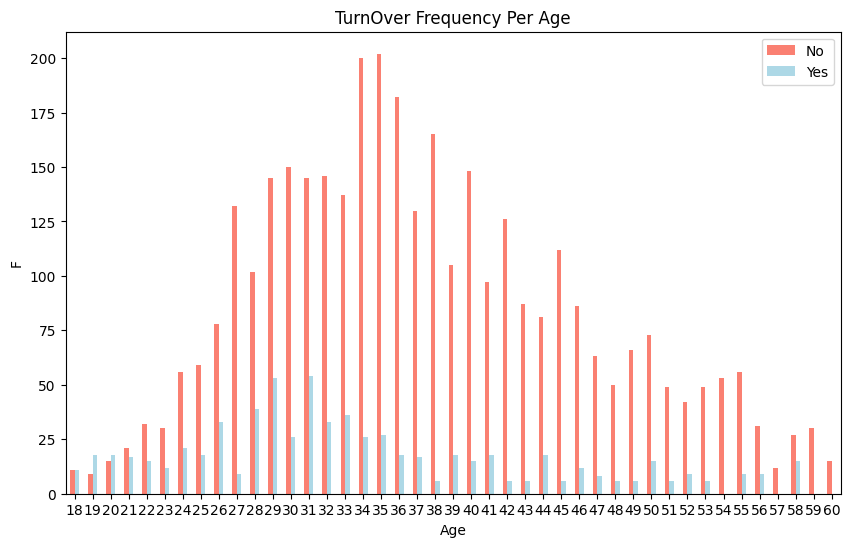

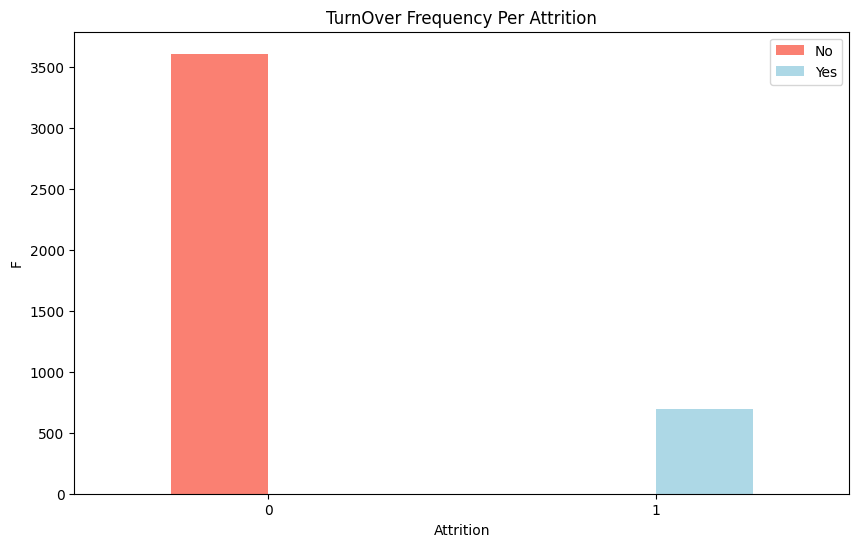

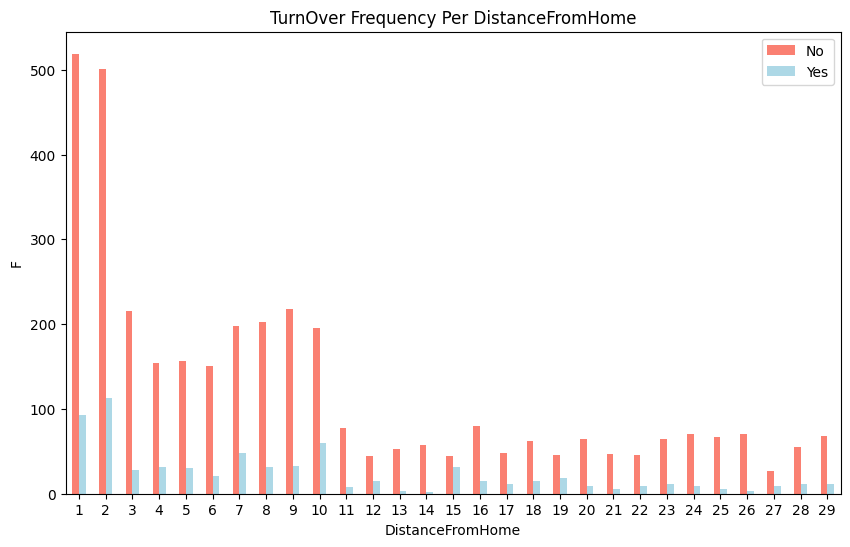

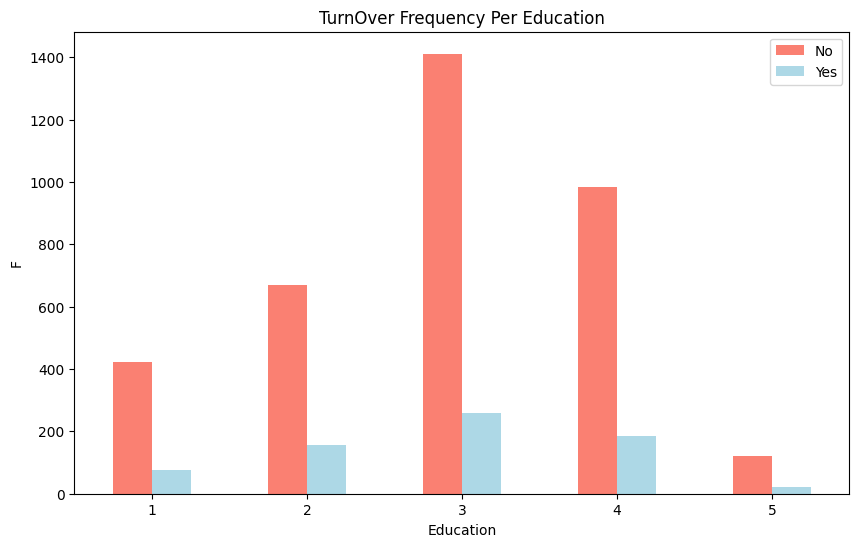

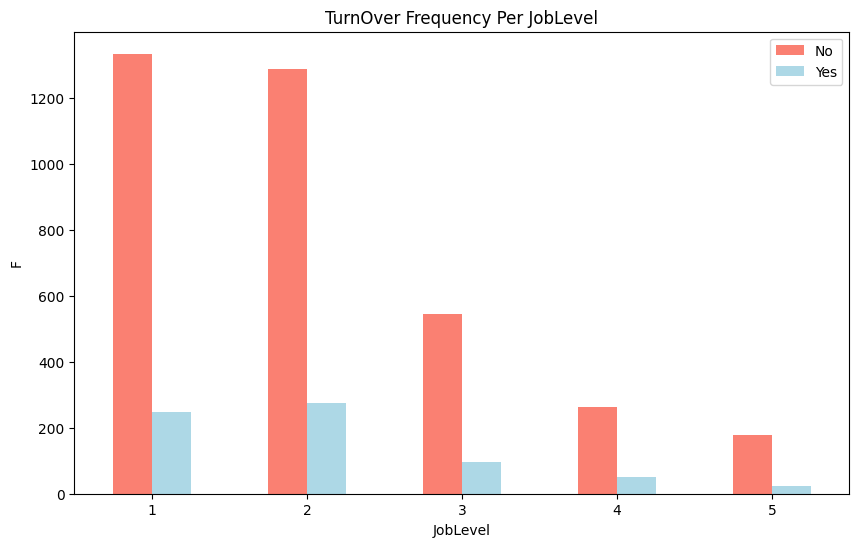

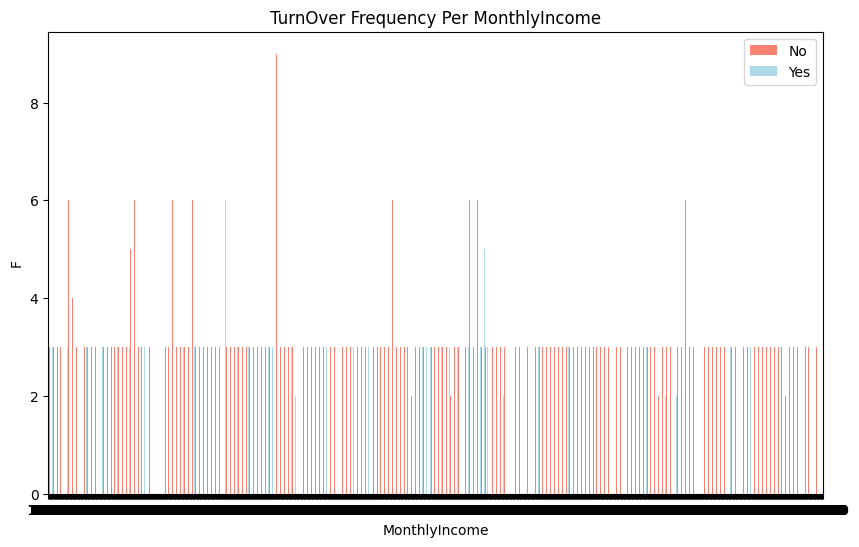

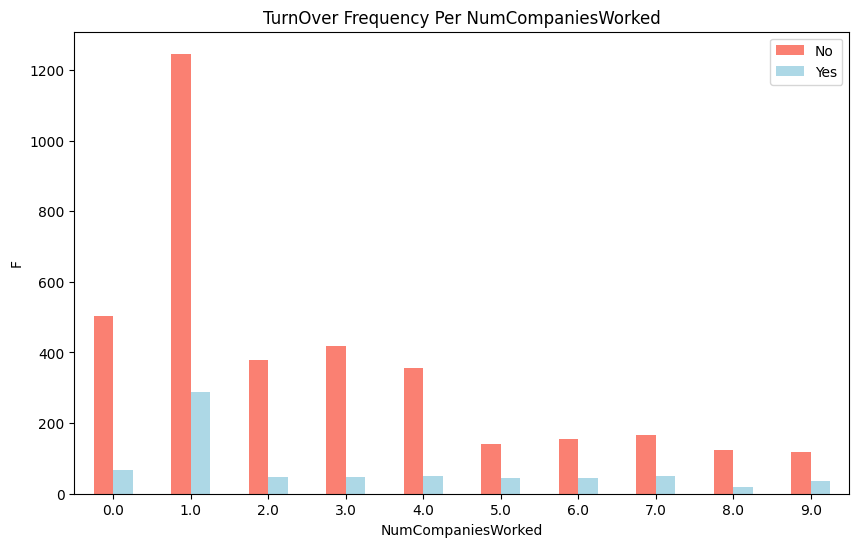

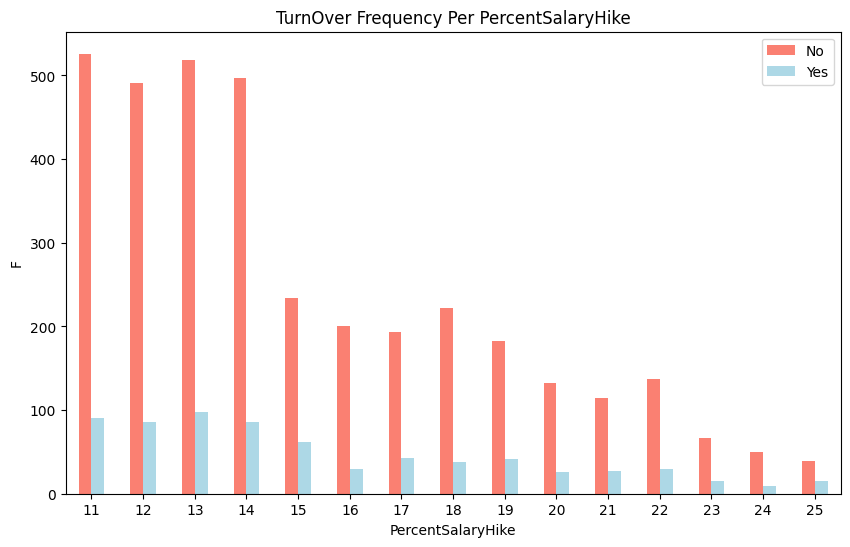

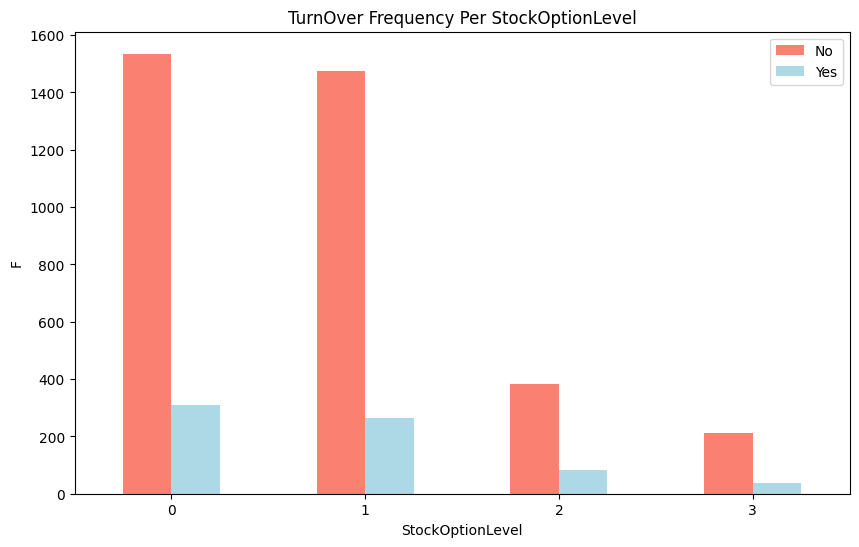

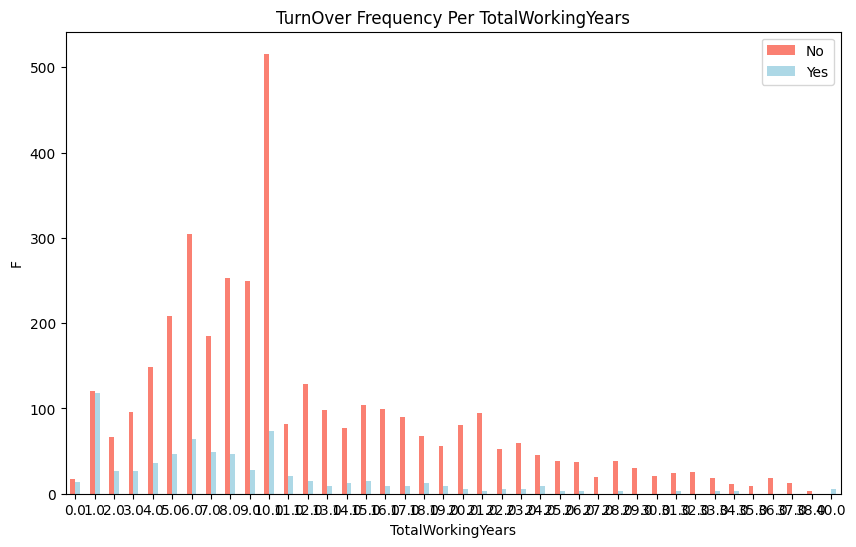

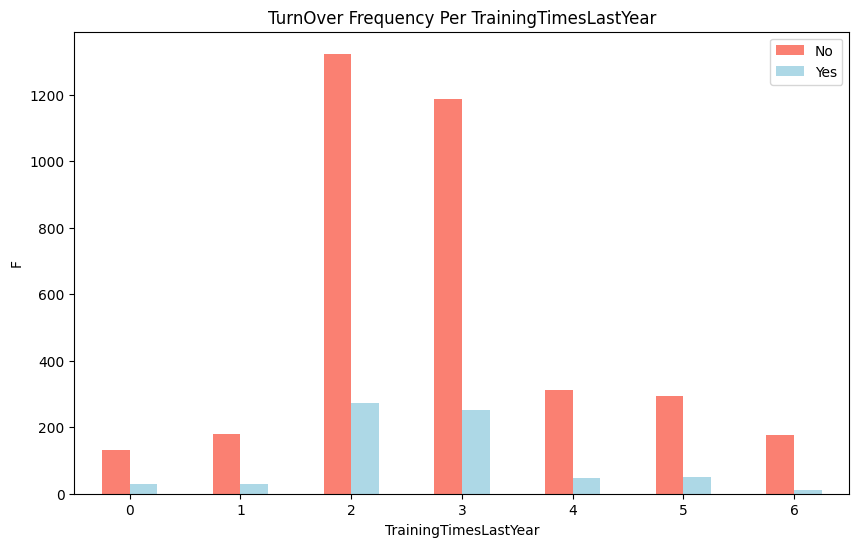

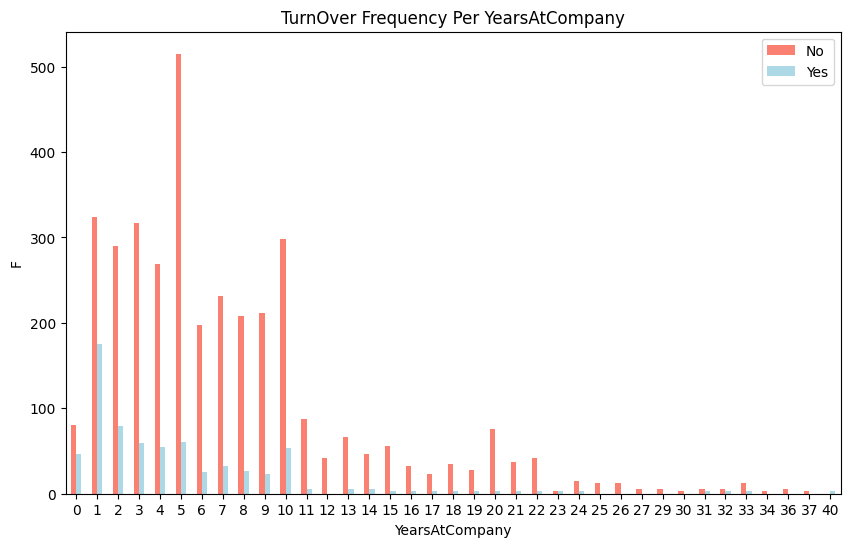

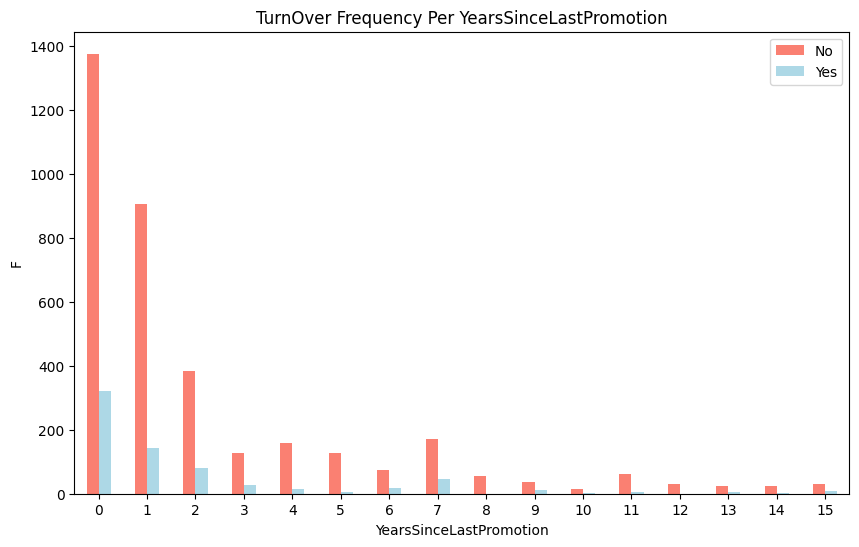

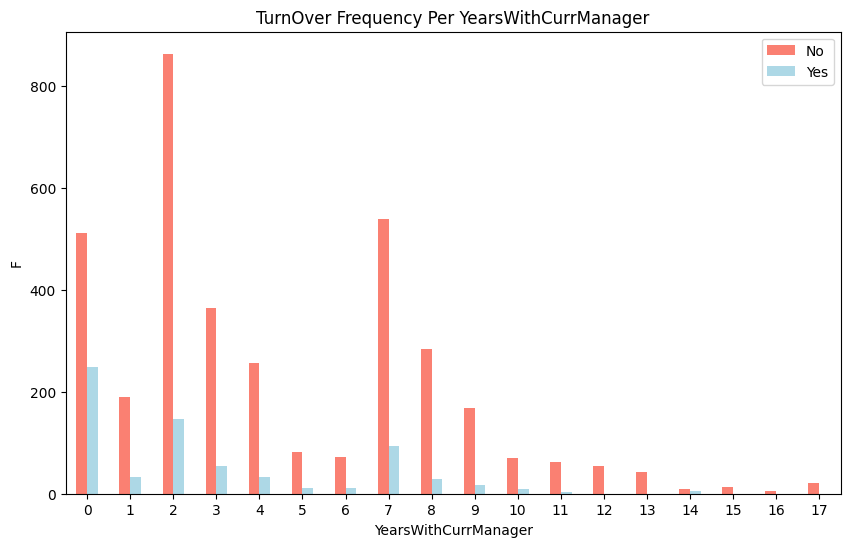

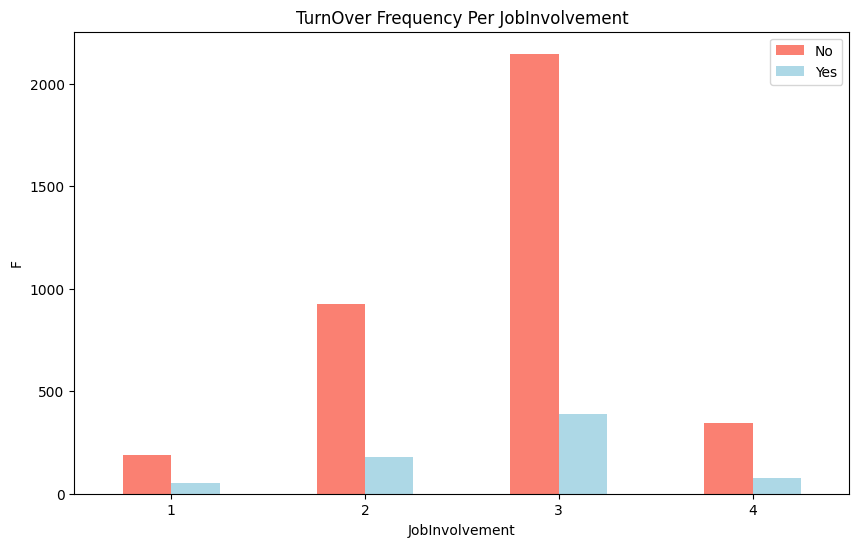

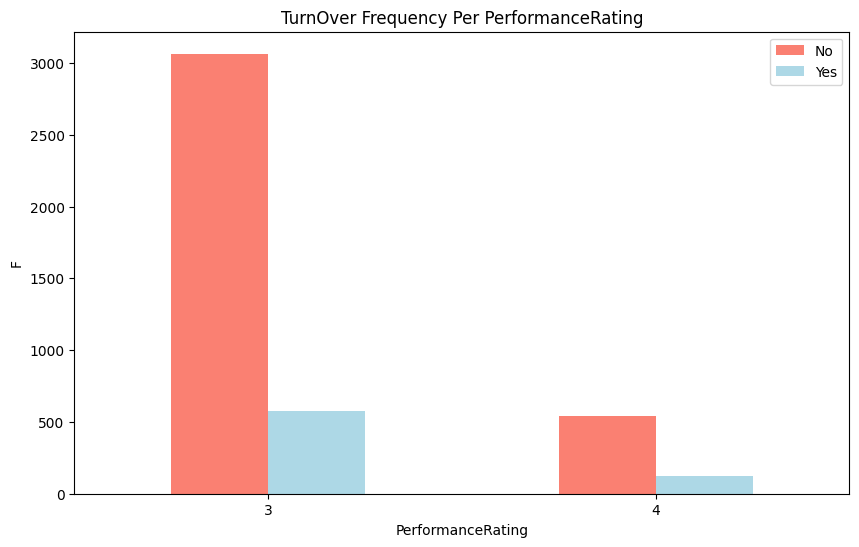

C:\Users\steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


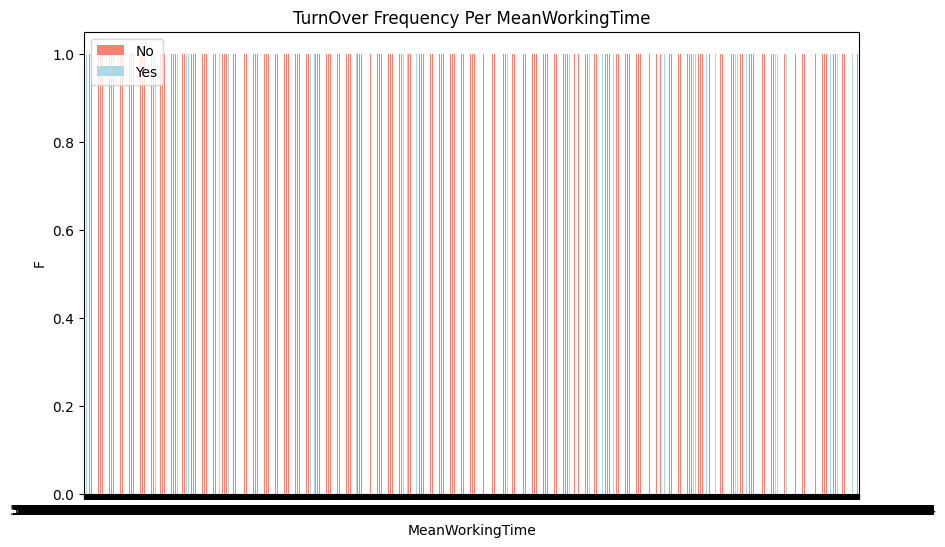

In [15]:
for col in data_stats.select_dtypes({'int64', 'float64','uint8'}) :
    pd.crosstab(data_stats[col], data_stats.Attrition).plot(kind="bar",
                                       figsize=(10, 6),
                                       color=["salmon", "lightblue"])

    # Plotter les graphes
    plt.title(f"TurnOver Frequency Per {col}")
    plt.xlabel(col)
    plt.ylabel("F")
    plt.legend(["No", "Yes"])
    plt.xticks(rotation=0)

## Split des données

In [16]:
data_merge['Attrition'] = data_merge['Attrition'].replace(['Yes','No'],[1,0])
data_merge['Gender'] = data_merge['Gender'].replace(['Female','Male'],[1,0])
X = data_merge.drop("Attrition", axis=1)
y = data_merge["Attrition"].copy()

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [18]:
X_train.shape

(3528, 25)

In [19]:
y_train.shape

(3528,)

In [20]:
X_test.shape

(882, 25)

In [21]:
y_test.shape

(882,)

## Transformation des données avec un pipeline
Etapes :

A l'aide de la pipline nous supprimons les attributs de types string à l'aide d'un encodeur incrementale sur les champs :
- MaritalStatus
- JobRole
- BusinessTravel
- Department
- EducationField
- Male /female

Visualisation de la matrice des données.

In [22]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


 
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
    
 
data_num = X_train.select_dtypes(include=[np.number])
 
num_attribs = list(data_num)
cat_attribs = ["MaritalStatus", "JobRole"]
cat_attribs_ordinal = ["BusinessTravel","EducationField","Department"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ('cat_ordinal', OrdinalEncoder(), cat_attribs_ordinal)
    ])
 
X_prepared = full_pipeline.fit_transform(X_train)


X_prepared

array([[-0.67809189,  1.15451799,  0.32380615, ...,  2.        ,
         1.        ,  1.        ],
       [ 1.15931839, -0.67610649,  0.32380615, ...,  2.        ,
         1.        ,  1.        ],
       [ 1.15931839,  0.23920575,  0.32380615, ...,  2.        ,
         3.        ,  1.        ],
       ...,
       [ 1.15931839, -0.67610649,  0.32380615, ...,  2.        ,
         1.        ,  1.        ],
       [ 0.24061325, -1.59141873,  0.32380615, ...,  2.        ,
         3.        ,  1.        ],
       [-1.59679703,  0.23920575, -1.10775787, ...,  1.        ,
         1.        ,  1.        ]])

In [23]:
X_prepared.shape

(3528, 35)

In [24]:
X_train.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingTime
count,3509.000000,3509.000000,3499.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3513.000000,3528.000000,3528.000000,3521.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,2.736677,2.737247,2.771935,36.960034,9.183390,2.917800,0.395975,2.065476,65401.408730,2.695132,15.184807,0.791383,11.293099,2.808107,6.947279,2.173469,4.092404,2.732993,3.151361,7.685533
std,1.091416,1.095464,0.701221,9.138840,8.112869,1.024254,0.489128,1.116146,47098.630731,2.483114,3.639305,0.843336,7.811150,1.291297,6.056070,3.193319,3.553547,0.708104,0.358451,1.332458
min,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.950504
25%,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,0.000000,1.000000,29312.500000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,6.650831
50%,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,0.000000,2.000000,49655.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,7.401070
75%,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.000000,3.000000,84460.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,8.313401
max,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,11.030960


test random forest classificateur

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)
y_probas_forest = cross_val_predict(forest_clf, X_prepared, y_train, cv=3,method="predict_proba")

In [26]:
y_probas_forest

array([[0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1]])

In [27]:
from sklearn.metrics import roc_curve


y_scores_forest = y_probas_forest[0:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)




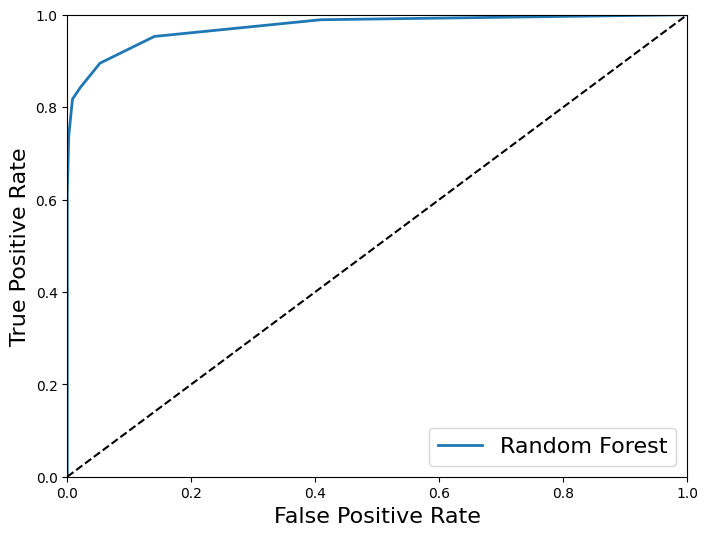

In [30]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores_forest)


0.9538087206853564

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
forest_reg = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(forest_reg, param_distribs, cv=5,
                           scoring='accuracy', return_train_score=True)
random_search.fit(X_prepared, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000262FEBF7E50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000262FEBF7D60>},
                   return_train_score=True, scoring='accuracy')

In [ ]:
cv_res = random_search.cv_results_
k = list(cv_res)
k
mean_score = zip(cv_res['rank_test_score'],cv_res["params"])
list(mean_score)

[(7, {'max_features': 3, 'n_estimators': 162}),
 (2, {'max_features': 7, 'n_estimators': 127}),
 (1, {'max_features': 7, 'n_estimators': 145}),
 (3, {'max_features': 4, 'n_estimators': 159}),
 (10, {'max_features': 6, 'n_estimators': 140}),
 (7, {'max_features': 4, 'n_estimators': 26}),
 (9, {'max_features': 1, 'n_estimators': 109}),
 (5, {'max_features': 1, 'n_estimators': 177}),
 (5, {'max_features': 1, 'n_estimators': 180}),
 (4, {'max_features': 3, 'n_estimators': 158})]

In [ ]:
feature_importances = random_search.best_estimator_.feature_importances_
feature_importances

array([0.03674908, 0.0339739 , 0.0278906 , 0.07844403, 0.04724265,
       0.02420163, 0.01089182, 0.02327434, 0.06694087, 0.04193425,
       0.04342581, 0.01972732, 0.07437908, 0.02930595, 0.05466672,
       0.03104368, 0.04344654, 0.02100728, 0.00694594, 0.12213029,
       0.00816733, 0.00987361, 0.02390217, 0.00616699, 0.00360218,
       0.00747499, 0.00442453, 0.00448373, 0.00740468, 0.00922744,
       0.01004026, 0.00511753, 0.01810045, 0.02699012, 0.01740222])

In [ ]:
cat_encoder_ordinal = full_pipeline.named_transformers_['cat_ordinal']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_ordinal_attribs = list(cat_encoder_ordinal.categories_[0])
attributes = num_attribs + cat_one_hot_attribs + cat_ordinal_attribs
result_featurs= sorted(zip(feature_importances, attributes), reverse=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


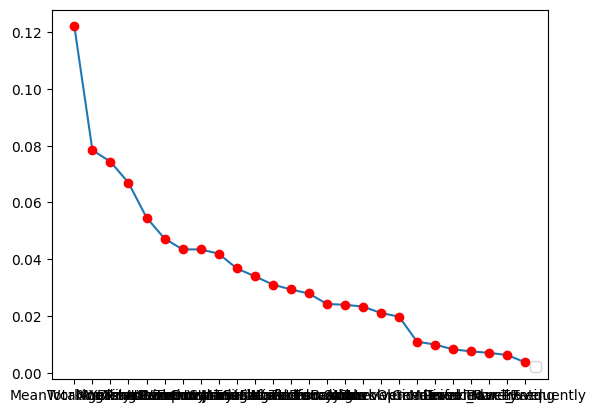

In [ ]:
x_val = [x[0] for x in result_featurs]
y_val = [x[1] for x in result_featurs]
plt.legend(loc="lower right")
fontsize=80
plt.plot(y_val,x_val)
plt.plot(y_val,x_val,'or')
plt.show()